***CNS LAB***

XOR

In [ ]:
#XOR
def xor_with_0():
    str1 = "Hello World"
    str2 = ""

    print("The Plain Text:", str1)
    # XOR each character with 0 and store in str2
    for ch in str1:
        str2 += chr(ord(ch) ^ 0)
    print("The Cipher Text:", str2)
xor_with_0()


The Plain Text: Hello World
The Cipher Text: Hello World


XOR, AND, OR

In [ ]:
def fun():
    str1 = "Hello World"
    str2 = ""
    str3=""
    str4=""

    print("The Plain Text:", str1)
    for ch in str1:
        str2 += chr(ord(ch) ^ 127)
        str3 += chr(ord(ch) | 127)
        str4 += chr(ord(ch) & 127)

    print("The Cipher Text with xor",str2)
    print("The Cipher Text with or", str3)
    print("The Cipher Text with and",str4)

fun()


The Plain Text: Hello World

The Cipher Text with or 
The Cipher Text with and Hello World


Caeser cipher

In [ ]:
def encrypt(text,s):
    result = ""
    for i in range(len(text)):
        char = text[i]
        if (char.isupper()):
            result += chr((ord(char) + s-65) % 26 + 65)
        else:
            result += chr((ord(char) + s - 97) % 26 + 97)
    return result
text = "ATTACKATONCE"
s = 3
print ("Text  : " + text)
print ("Shift : " + str(s))
print ("Cipher: " + encrypt(text,s))


Text  : ATTACKATONCE
Shift : 3
Cipher: DWWDFNDWRQFH


**Substitution cipher**  Vigenère cipher - poly alphabetic substitution cipher


In [ ]:
# Vigenère cipher - polyalphabetic substitution cipher
def encrypt(text, s):
    """Encrypt the given text using the Vigenère cipher."""
    result = ""
    s_length = len(s)

    for i in range(len(text)):
        char = text[i]
        if char.isupper():
            shift = ord(s[i % s_length]) - 65
            result += chr((ord(char) + shift - 65) % 26 + 65)
        else:
            shift = ord(s[i % s_length]) - 97
            result += chr((ord(char) + shift - 97) % 26 + 97)

    return result

def decrypt(cipher, s):
    """Decrypt the given cipher using the Vigenère cipher."""
    result = ""
    s_length = len(s)

    for i in range(len(cipher)):
        char = cipher[i]
        if char.isupper():
            shift = ord(s[i % s_length]) - 65
            result += chr((ord(char) - shift - 65) % 26 + 65)
        else:
            shift = ord(s[i % s_length]) - 97
            result += chr((ord(char) - shift - 97) % 26 + 97)

    return result

# Example usage
text = "GOODNIGHT"
s = "HILLMAGIC"

# Encryption
cipher_text = encrypt(text, s)
print("Cipher: " + cipher_text)

# Decryption
plain_text = decrypt(cipher_text, s)
print("Decrypted: " + plain_text)


Cipher: NWZOZIMPV
Decrypted: GOODNIGHT


Substituition cipher

In [ ]:
def encrypt(message, key):
    encrypted_message = []
    for char in message:
        if 'a' <= char <= 'z':  # Check if it's a lowercase letter
            encrypted_message.append(key[ord(char) - ord('a')])
        else:
            encrypted_message.append(char)  # Leave non-lowercase characters unchanged
    return ''.join(encrypted_message)

def decrypt(message, key):
    decrypted_message = []
    for char in message:
        if char in key:
            decrypted_message.append(chr(key.index(char) + ord('a')))
        else:
            decrypted_message.append(char)  # Leave non-lowercase characters unchanged
    return ''.join(decrypted_message)

# Input the substitution key
key = input("Enter the substitution key (26 lowercase letters in random order): ")

# Validate key length
if len(key) != 26:
    print("Invalid key length. Please provide 26 letters.")
    exit(1)

# Validate key characters
if not all('a' <= char <= 'z' for char in key):
    print("Invalid key. Please provide only lowercase letters.")
    exit(1)

# Input the message
message = input("Enter the message to encrypt: ")

# Encrypt the message
encrypted_message = encrypt(message, key)
print("Encrypted message:", encrypted_message)

# Decrypt the message
decrypted_message = decrypt(encrypted_message, key)
print("Decrypted message:", decrypted_message)


Enter the substitution key (26 lowercase letters in random order): qwertyuiopasdfghjklzxcvbnm
Enter the message to encrypt: goodnight
Encrypted message: uggrfouiz
Decrypted message: goodnight


Hill Cipher

In [ ]:
keyMatrix = [[0] * 3 for i in range(3)]
messageVector = [[0] for i in range(3)]
cipherMatrix = [[0] for i in range(3)]
def getKeyMatrix(key):
	k = 0
	for i in range(3):
		for j in range(3):
			keyMatrix[i][j] = ord(key[k]) % 65
			k += 1
def encrypt(messageVector):
	for i in range(3):
		for j in range(1):
			cipherMatrix[i][j] = 0
			for x in range(3):
				cipherMatrix[i][j] += (keyMatrix[i][x] * messageVector[x][j])
			cipherMatrix[i][j] = cipherMatrix[i][j] % 26
def HillCipher(message, key):
	getKeyMatrix(key)
	for i in range(3):
		messageVector[i][0] = ord(message[i]) % 65
	encrypt(messageVector)
	CipherText = []
	for i in range(3):
		CipherText.append(chr(cipherMatrix[i][0] + 65))
	print("Ciphertext: ", "".join(CipherText))

def main():
	message = "ACT"
	key = "GYBNQKURP"
	HillCipher(message, key)
if __name__ == "__main__":
	main()


Ciphertext:  POH


Decryption of Hill cipher

In [ ]:
import numpy as np

# Initialize matrices
keyMatrix = [[0] * 3 for _ in range(3)]
messageVector = [[0] for _ in range(3)]
cipherMatrix = [[0] for _ in range(3)]
decryptedMessageVector = [[0] for _ in range(3)]

def getKeyMatrix(key):
    k = 0
    for i in range(3):
        for j in range(3):
            keyMatrix[i][j] = ord(key[k]) % 65  # Convert character to numerical value
            k += 1

def encrypt(messageVector):
    for i in range(3):
        cipherMatrix[i][0] = 0
        for x in range(3):
            cipherMatrix[i][0] += (keyMatrix[i][x] * messageVector[x][0])
        cipherMatrix[i][0] = cipherMatrix[i][0] % 26  # Modulo 26 for encryption

def decrypt(cipherMatrix):
    # Calculate the inverse of the key matrix modulo 26
    keyMatrix_inv = np.zeros((3, 3), dtype=int)

    # Calculate the determinant of the key matrix
    det = int(np.round(np.linalg.det(keyMatrix)))  # Determinant
    det_mod_inv = pow(det % 26, -1, 26)  # Modular multiplicative inverse of the determinant

    # Calculate the matrix of minors, cofactors, and adjugate
    for i in range(3):
        for j in range(3):
            minor = np.delete(np.delete(keyMatrix, i, axis=0), j, axis=1)
            keyMatrix_inv[j][i] = int(((-1) ** (i + j)) * np.round(np.linalg.det(minor))) % 26

    # Multiply by the modular inverse of the determinant
    for i in range(3):
        for j in range(3):
            keyMatrix_inv[i][j] = (keyMatrix_inv[i][j] * det_mod_inv) % 26

    # Decrypt the message using the inverse key matrix
    for i in range(3):
        decryptedMessageVector[i][0] = 0
        for x in range(3):
            decryptedMessageVector[i][0] += (keyMatrix_inv[i][x] * cipherMatrix[x][0])
        decryptedMessageVector[i][0] = decryptedMessageVector[i][0] % 26  # Modulo 26 for decryption

def HillCipher(message, key):
    getKeyMatrix(key)
    for i in range(3):
        messageVector[i][0] = ord(message[i]) % 65  # Convert character to numerical value
    encrypt(messageVector)

    # Convert cipherMatrix to ciphertext
    CipherText = []
    for i in range(3):
        CipherText.append(chr(cipherMatrix[i][0] + 65))
    print("Ciphertext: ", "".join(CipherText))

    # Decrypting the ciphertext
    decrypt(cipherMatrix)

    # Convert decryptedMessageVector back to characters
    DecryptedText = []
    for i in range(3):
        DecryptedText.append(chr(decryptedMessageVector[i][0] + 65))
    print("Decrypted Text: ", "".join(DecryptedText))

def main():
    message = "ACT"
    key = "GYBNQKURP"
    HillCipher(message, key)

if __name__ == "__main__":
    main()


Ciphertext:  POH
Decrypted Text:  ACT


Playfair with decryption

In [ ]:
# Function to convert the string to lowercase
def toLowerCase(text):
    return text.lower()
# Function to remove all spaces in a string
def removeSpaces(text):
    newText = ""
    for i in text:
        if i == " ":
            continue
        else:
            newText = newText + i
    return newText
# Function to group 2 elements of a string as a list element
def Diagraph(text):
    Diagraph = []
    group = 0
    for i in range(2, len(text), 2):
        Diagraph.append(text[group:i])
        group = i
    Diagraph.append(text[group:])
    return Diagraph
# Function to fill a letter in a string element
# If 2 letters in the same string matches
def FillerLetter(text):
    k = len(text)
    if k % 2 == 0:
        for i in range(0, k, 2):
            if text[i] == text[i+1]:
                new_word = text[0:i+1] + str('x') + text[i+1:]
                new_word = FillerLetter(new_word)
                break
            else:
                new_word = text
    else:
        for i in range(0, k-1, 2):
            if text[i] == text[i+1]:
                new_word = text[0:i+1] + str('x') + text[i+1:]
                new_word = FillerLetter(new_word)
                break
            else:
                new_word = text
    return new_word
list1 = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
# Function to generate the 5x5 key square matrix
def generateKeyTable(word, list1):
    key_letters = []
    for i in word:
        if i not in key_letters:
            key_letters.append(i)
    compElements = []
    for i in key_letters:
        if i not in compElements:
            compElements.append(i)
    for i in list1:
        if i not in compElements:
            compElements.append(i)
    matrix = []
    while compElements != []:
        matrix.append(compElements[:5])
        compElements = compElements[5:]
    return matrix
def search(mat, element):
    for i in range(5):
        for j in range(5):
            if(mat[i][j] == element):
                return i, j
def encrypt_RowRule(matr, e1r, e1c, e2r, e2c):
    char1 = ''
    if e1c == 4:
        char1 = matr[e1r][0]
    else:
        char1 = matr[e1r][e1c+1]
    char2 = ''
    if e2c == 4:
        char2 = matr[e2r][0]
    else:
        char2 = matr[e2r][e2c+1]
    return char1, char2
def encrypt_ColumnRule(matr, e1r, e1c, e2r, e2c):
    char1 = ''
    if e1r == 4:
        char1 = matr[0][e1c]
    else:
        char1 = matr[e1r+1][e1c]
    char2 = ''
    if e2r == 4:
        char2 = matr[0][e2c]
    else:
        char2 = matr[e2r+1][e2c]
    return char1, char2
def encrypt_RectangleRule(matr, e1r, e1c, e2r, e2c):
    char1 = ''
    char1 = matr[e1r][e2c]
    char2 = ''
    char2 = matr[e2r][e1c]
    return char1, char2
def encryptByPlayfairCipher(Matrix, plainList):
    CipherText = []
    for i in range(0, len(plainList)):
        c1 = 0
        c2 = 0
        ele1_x, ele1_y = search(Matrix, plainList[i][0])
        ele2_x, ele2_y = search(Matrix, plainList[i][1])
        if ele1_x == ele2_x:
            c1, c2 = encrypt_RowRule(Matrix, ele1_x, ele1_y, ele2_x, ele2_y)
            # Get 2 letter cipherText
        elif ele1_y == ele2_y:
            c1, c2 = encrypt_ColumnRule(Matrix, ele1_x, ele1_y, ele2_x, ele2_y)
        else:
            c1, c2 = encrypt_RectangleRule(
                Matrix, ele1_x, ele1_y, ele2_x, ele2_y)
        cipher = c1 + c2
        CipherText.append(cipher)
    return CipherText
def decrypt_RowRule(matr, e1r, e1c, e2r, e2c):
    """
    Decrypt using the row rule.
    """
    char1 = ''
    if e1c == 0:
        char1 = matr[e1r][4]
    else:
        char1 = matr[e1r][e1c-1]
    char2 = ''
    if e2c == 0:
        char2 = matr[e2r][4]
    else:
        char2 = matr[e2r][e2c-1]
    return char1, char2
def decrypt_ColumnRule(matr, e1r, e1c, e2r, e2c):
    """
    Decrypt using the column rule.
    """
    char1 = ''
    if e1r == 0:
        char1 = matr[4][e1c]
    else:
        char1 = matr[e1r-1][e1c]
    char2 = ''
    if e2r == 0:
        char2 = matr[4][e2c]
    else:
        char2 = matr[e2r-1][e2c]
    return char1, char2
def decrypt_RectangleRule(matr, e1r, e1c, e2r, e2c):
    """
    Decrypt using the rectangle rule.
    """
    char1 = ''
    char1 = matr[e1r][e2c]
    char2 = ''
    char2 = matr[e2r][e1c]
    return char1, char2
def decryptByPlayfairCipher(Matrix, cipherList):
    """
    Decrypt the ciphertext using the Playfair Cipher.
    """
    PlainText = []
    for i in range(0, len(cipherList)):
        c1 = 0
        c2 = 0
        ele1_x, ele1_y = search(Matrix, cipherList[i][0])
        ele2_x, ele2_y = search(Matrix, cipherList[i][1])
        if ele1_x == ele2_x:
            c1, c2 = decrypt_RowRule(Matrix, ele1_x, ele1_y, ele2_x, ele2_y)
        elif ele1_y == ele2_y:
            c1, c2 = decrypt_ColumnRule(Matrix, ele1_x, ele1_y, ele2_x, ele2_y)
        else:
            c1, c2 = decrypt_RectangleRule(
                Matrix, ele1_x, ele1_y, ele2_x, ele2_y)
        plain = c1 + c2
        PlainText.append(plain)
    return PlainText
text_Plain = 'hello world'
text_Plain = removeSpaces(toLowerCase(text_Plain))
PlainTextList = Diagraph(FillerLetter(text_Plain))
# print(PlainTextList) --> ['in', 'st', 'ru', 'me', 'nt', 's']
if len(PlainTextList[-1]) != 2:
    PlainTextList[-1] = PlainTextList[-1]+'z'
key = "monarchy"
print("Key text:", key)
key = toLowerCase(key)
Matrix = generateKeyTable(key, list1)
print("Plain Text:", text_Plain)
CipherList = encryptByPlayfairCipher(Matrix, PlainTextList)
CipherText = ""
for i in CipherList:
    CipherText += i
print("CipherText:", CipherText)
# Decrypting the Cipher Text
CipherList = Diagraph(CipherText)
DecryptedList = decryptByPlayfairCipher(Matrix, CipherList)
# Joining the decrypted text to form the original plaintext
DecryptedText = ""
for i in DecryptedList:
    DecryptedText += i
# Removing padding characters added during encryption
DecryptedText = DecryptedText.rstrip('z')  # Remove trailing 'z' if it was added during encryption
DecryptedText = DecryptedText.replace('x', '')  # Remove 'x' added for duplicate letters
print("Decrypted Text:", DecryptedText)

Key text: monarchy
Plain Text: helloworld
CipherText: cfsupmvnmtkr
Decrypted Text: helloworld


DES

In [ ]:
!pip install pycryptodome


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.2 MB/s eta 0:00:00


In [ ]:
from Crypto.Cipher import DES
from binascii import unhexlify, hexlify
# Function to perform DES encryption
def des_encrypt(key, plaintext):
    # Create a DES cipher object in ECB mode
    cipher = DES.new(key, DES.MODE_ECB)
    # Encrypt the plaintext
    ciphertext = cipher.encrypt(plaintext)
    return ciphertext
# Function to perform DES decryption
def des_decrypt(key, ciphertext):
    # Create a DES cipher object in ECB mode
    cipher = DES.new(key, DES.MODE_ECB)
    # Decrypt the ciphertext
    decrypted_text = cipher.decrypt(ciphertext)
    return decrypted_text
# Main function
if __name__ == "__main__":
    # Plaintext and key in hex format
    plaintext_hex = "8787878787778767"
    key_hex = "0E329232EA6D0D73"
    # Convert the plaintext and key from hex to bytes
    plaintext = unhexlify(plaintext_hex)
    key = unhexlify(key_hex)
    # Perform DES encryption
    ciphertext = des_encrypt(key, plaintext)
    # Convert the ciphertext from bytes to hex
    ciphertext_hex = hexlify(ciphertext).upper().decode()
    print(f"Ciphertext: {ciphertext_hex}")
    # To verify, let's decrypt the ciphertext back to plaintext
    decrypted_text = des_decrypt(key, ciphertext)
    decrypted_text_hex = hexlify(decrypted_text).upper().decode()
    print(f"Decrypted text: {decrypted_text_hex}")


Ciphertext: F9A852F515F72D79
Decrypted text: 8787878787778767


AES

In [ ]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes
import base64

# Function to encrypt a message
def encrypt_aes(key, plaintext):
    cipher = AES.new(key, AES.MODE_CBC)
    ct_bytes = cipher.encrypt(pad(plaintext.encode(), AES.block_size))
    iv = cipher.iv
    return base64.b64encode(iv + ct_bytes).decode('utf-8')

# Function to decrypt a message
def decrypt_aes(key, ciphertext):
    decoded = base64.b64decode(ciphertext)
    iv = decoded[:AES.block_size]
    ct = decoded[AES.block_size:]
    cipher = AES.new(key, AES.MODE_CBC, iv)
    pt = unpad(cipher.decrypt(ct), AES.block_size)
    return pt.decode('utf-8')

# Example usage
key = get_random_bytes(16)  # AES key must be either 16, 24, or 32 bytes long
plaintext = "Hello, World!"

# Encrypt the message
ciphertext = encrypt_aes(key, plaintext)
print(f"Ciphertext: {ciphertext}")

# Decrypt the message
decrypted_text = decrypt_aes(key, ciphertext)
print(f"Decrypted Text: {decrypted_text}")


Ciphertext: cCJpeiYIT3fmNDOMlFvyTLCzDBqnE5ZtrPf3ze770v4=
Decrypted Text: Hello, World!


BlowFish

In [ ]:
from Crypto.Cipher import Blowfish
from binascii import unhexlify, hexlify
# Function to perform Blowfish encryption
def des_encrypt(key, plaintext):
    # Create a Blowfish cipher object in ECB mode
    cipher = Blowfish.new(key, Blowfish.MODE_ECB)
    # Encrypt the plaintext
    ciphertext = cipher.encrypt(plaintext)
    return ciphertext
# Function to perform Blowfish decryption
def des_decrypt(key, ciphertext):
    # Create a Blowfish cipher object in ECB mode
    cipher = Blowfish.new(key, Blowfish.MODE_ECB)
    # Decrypt the ciphertext
    decrypted_text = cipher.decrypt(ciphertext)
    return decrypted_text
# Main function
if __name__ == "__main__":
    # Plaintext and key in hex format
    plaintext_hex = "123456abcd132536"
    key_hex = "aabb09182736ccdd"
    # Convert the plaintext and key from hex to bytes
    plaintext = unhexlify(plaintext_hex)
    key = unhexlify(key_hex)
    # Perform Blowfish encryption
    ciphertext = des_encrypt(key, plaintext)
    # Convert the ciphertext from bytes to hex
    ciphertext_hex = hexlify(ciphertext).decode()
    print(f"Ciphertext: {ciphertext_hex}")
    # To verify, let's decrypt the ciphertext back to plaintext
    decrypted_text = des_decrypt(key, ciphertext)
    decrypted_text_hex = hexlify(decrypted_text).decode()
    print(f"Decrypted text: {decrypted_text_hex}")


Ciphertext: c8fdcaea64fa2c82
Decrypted text: 123456abcd132536


RC4 without built-in short version

In [ ]:
def swap(a,b):
    return b,a

def KSA(key):
    key_length=len(key)
    S=list(range(256))
    j=0
    for i in range(256):
        j=(j+S[i]+key[i%key_length])%256
        S[i],S[j]=swap(S[i],S[j])
    return S

def PRGA(S,data_length):
    i=0
    j=0
    keystream=[]
    for _ in range(data_length):
        i=(i+1)%256
        j=(j+S[i])%256
        S[i],S[j]=swap(S[i],S[j])
        K=S[(S[i]+S[j])%256]
        keystream.append(K)
    return keystream

def rc4(key,data):
    key=[ord(c) for c in key]
    S=KSA(key)
    keystream=PRGA(S,len(data))
    return [data[i]^keystream[i] for i in range(len(data))]

def main():
    key=input("Enter the key: ")
    plaintext=input("Enter the plaintext: ")
    plaintext_bytes=[ord(c) for c in plaintext]
    ciphertext=rc4(key,plaintext_bytes)
    print("Ciphertext: ",end="")
    for byte in ciphertext:
        print(f"{byte:02X}",end=" ")
    print()
    decrypted_bytes=rc4(key,ciphertext)
    decrypted_text=''.join([chr(byte) for byte in decrypted_bytes])
    print("Decrypted Text:",decrypted_text)

if __name__=="__main__":
    main()


Enter the key: 1234
Enter the plaintext: 1789
Ciphertext: 34 7E 49 96 
Decrypted Text: 1789


RSA

In [ ]:
from math import gcd
def RSA(p, q, message):
    # calculating n
    n = p * q
    # calculating totient, t
    t = (p - 1) * (q - 1)
    # selecting public key, e
    for i in range(2, t):
        if gcd(i, t) == 1:
            e = i
            break
    # selecting private key, d
    j = 0
    while True:
        if (j * e) % t == 1:
            d = j
            break
        j += 1
    # performing encryption
    ct = (message ** e) % n
    print(f"Encrypted message is {ct}")
    # performing decryption
    mes = (ct ** d) % n
    print(f"Decrypted message is {mes}")
# Testcase - 1
RSA(p=53, q=59, message=89)
# Testcase - 2
RSA(p=3, q=7, message=12)





Encrypted message is 1394
Decrypted message is 89
Encrypted message is 3
Decrypted message is 12


Deffie hellman key exchange

In [ ]:
#deffie hellman key exchange
import random

def find_primitive_root(Q):
    """Find a primitive root for prime Q."""
    for alpha in range(2, Q):
        seen = set()
        for x in range(1, Q):
            seen.add(pow(alpha, x, Q))
        if len(seen) == Q - 1:
            return alpha
    return None

# Prime number Q
Q = 23  # You can use any prime number here

# Find a primitive root modulo Q
alpha = find_primitive_root(Q)
if alpha is None:
    raise ValueError(f"No primitive root found for {Q}.")
else:
    print(f"A primitive root of {Q} is {alpha}.")

# Step 1: Alice and Bob choose their private keys
X_A = random.randint(1, Q-1)  # Alice's private key
X_B = random.randint(1, Q-1)  # Bob's private key

# Step 2: Calculate public keys
Y_A = pow(alpha, X_A, Q)  # Alice's public key
Y_B = pow(alpha, X_B, Q)  # Bob's public key

# Step 3: Calculate shared secrets
shared_secret_A = pow(Y_B, X_A, Q)  # Shared secret calculated by Alice
shared_secret_B = pow(Y_A, X_B, Q)  # Shared secret calculated by Bob

# Displaying results
print(f"Alice's Private Key (X_A): {X_A}")
print(f"Bob's Private Key (X_B): {X_B}")
print(f"Alice's Public Key (Y_A): {Y_A}")
print(f"Bob's Public Key (Y_B): {Y_B}")
print(f"Alice's Shared Secret: {shared_secret_A}")
print(f"Bob's Shared Secret: {shared_secret_B}")

# Verify that both shared secrets are the same
if shared_secret_A == shared_secret_B:
    print("Key exchange successful. Shared secret is established.")
else:
    print("Key exchange failed. Shared secrets do not match.")

A primitive root of 23 is 5.
Alice's Private Key (X_A): 8
Bob's Private Key (X_B): 19
Alice's Public Key (Y_A): 16
Bob's Public Key (Y_B): 7
Alice's Shared Secret: 12
Bob's Shared Secret: 12
Key exchange successful. Shared secret is established.


SHA-1


In [ ]:
#sha-1
import hashlib

text = "Hello, this is a sample text for SHA-1 digest."
sha1_hash = hashlib.sha1()
sha1_hash.update(text.encode('utf-8'))
digest = sha1_hash.hexdigest()
print(f"SHA-1 Digest: {digest}")


SHA-1 Digest: b7de0be6b7efce42ff1bea147edf80a973c33e6e


MD-5

In [ ]:
#md5
import hashlib

text = "Hello, this is a sample text for MD5 digest."
md5_hash = hashlib.md5()
md5_hash.update(text.encode('utf-8'))
digest = md5_hash.hexdigest()
print(f"MD5 Digest: {digest}")


MD5 Digest: 63b9b11ed6b6f10b09351dee05698fe2


euclidean and advanced euclidean

In [ ]:
#euclidean and advanced euclidean

def euclidean_algorithm(a, b):
    while b != 0:
        a, b = b, a % b
    return a

def extended_euclidean_algorithm(a, b):
    if b == 0:
        return a, 1, 0
    gcd, x1, y1 = extended_euclidean_algorithm(b, a % b)
    x = y1
    y = x1 - (a // b) * y1
    return gcd, x, y

a = 56
b = 98

gcd = euclidean_algorithm(a, b)
print(f"GCD of {a} and {b} using Euclidean Algorithm is {gcd}")

gcd, x, y = extended_euclidean_algorithm(a, b)
print(f"GCD of {a} and {b} using Extended Euclidean Algorithm is {gcd}")
print(f"Coefficients: x = {x}, y = {y}")


GCD of 56 and 98 using Euclidean Algorithm is 14
GCD of 56 and 98 using Extended Euclidean Algorithm is 14
Coefficients: x = 2, y = -1


Rail fence

In [ ]:
#rail fence

def rail_fence_encrypt(plaintext, key):
    rail = [['' for _ in range(len(plaintext))] for _ in range(key)]
    row, col, direction = 0, 0, 1
    for char in plaintext:
        rail[row][col] = char
        col += 1
        row += direction
        if row == 0 or row == key - 1:
            direction *= -1
    ciphertext = ''.join([''.join(rail[i]) for i in range(key)])
    return ciphertext

def rail_fence_decrypt(ciphertext, key):
    rail = [['' for _ in range(len(ciphertext))] for _ in range(key)]
    row, col, direction = 0, 0, 1
    for i in range(len(ciphertext)):
        rail[row][col] = '*'
        col += 1
        row += direction
        if row == 0 or row == key - 1:
            direction *= -1
    index = 0
    for r in range(key):
        for c in range(len(ciphertext)):
            if rail[r][c] == '*' and index < len(ciphertext):
                rail[r][c] = ciphertext[index]
                index += 1
    decrypted_text = []
    row, col, direction = 0, 0, 1
    for i in range(len(ciphertext)):
        decrypted_text.append(rail[row][col])
        col += 1
        row += direction
        if row == 0 or row == key - 1:
            direction *= -1
    return ''.join(decrypted_text)

plaintext = "HELLORAILFENCECIPHER"
key = 2
ciphertext = rail_fence_encrypt(plaintext, key)
print(f"Ciphertext: {ciphertext}")
decrypted_text = rail_fence_decrypt(ciphertext, key)
print(f"Decrypted text: {decrypted_text}")


Ciphertext: HLOALECCPEELRIFNEIHR
Decrypted text: HELLORAILFENCECIPHER


3DES

In [ ]:
#3DES

from Crypto.Cipher import DES3
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad
import base64

# Generate a random key for 3DES encryption (must be 16 or 24 bytes long)
key = DES3.adjust_key_parity(get_random_bytes(24))
def encrypt(plain_text, key):
    cipher = DES3.new(key, DES3.MODE_ECB)
    padded_text = pad(plain_text.encode(), DES3.block_size)
    encrypted_bytes = cipher.encrypt(padded_text)
    encrypted_base64 = base64.b64encode(encrypted_bytes).decode()
    return encrypted_bytes,  encrypted_base64
def decrypt(encrypted_bytes, key):
    cipher = DES3.new(key, DES3.MODE_ECB)
    decrypted_padded_text = cipher.decrypt(encrypted_bytes)
    decrypted_text = unpad(decrypted_padded_text, DES3.block_size)
    return decrypted_text.decode()
plain_text = 'hello'
encrypted_bytes, encrypted_base64 = encrypt(plain_text, key)
print("Original Plain Text:", plain_text)
print("Encrypted (Base64):", encrypted_base64)
decrypted_text = decrypt(encrypted_bytes, key)
print("Decrypted Text:", decrypted_text)

Original Plain Text: hello
Encrypted (Base64): xFPSs+Mrwfk=
Decrypted Text: hello


Vigenere cipher

In [ ]:
#Vigenere

def vigenere_encrypt(plaintext, key):
    key = (key * (len(plaintext) // len(key))) + key[:len(plaintext) % len(key)]
    ciphertext = ''
    for p, k in zip(plaintext, key):
        if p.isalpha():
            shift = ord(k.lower()) - ord('a')
            if p.islower():
                ciphertext += chr((ord(p) - ord('a') + shift) % 26 + ord('a'))
            else:
                ciphertext += chr((ord(p) - ord('A') + shift) % 26 + ord('A'))
        else:
            ciphertext += p
    return ciphertext

def vigenere_decrypt(ciphertext, key):
    key = (key * (len(ciphertext) // len(key))) + key[:len(ciphertext) % len(key)]
    plaintext = ''
    for c, k in zip(ciphertext, key):
        if c.isalpha():
            shift = ord(k.lower()) - ord('a')
            if c.islower():
                plaintext += chr((ord(c) - ord('a') - shift) % 26 + ord('a'))
            else:
                plaintext += chr((ord(c) - ord('A') - shift) % 26 + ord('A'))
        else:
            plaintext += c
    return plaintext

plaintext = "HELLO VIGENERE CIPHER"
key = "KEY"

ciphertext = vigenere_encrypt(plaintext, key)
print(f"Ciphertext: {ciphertext}")

decrypted_text = vigenere_decrypt(ciphertext, key)
print(f"Decrypted text: {decrypted_text}")


Ciphertext: RIJVS FMEORCBI MMNRIP
Decrypted text: HELLO VIGENERE CIPHER


Vernam cipher

In [ ]:
#vernam
def vernam_encrypt(plaintext, key):
    if len(plaintext) != len(key):
        raise ValueError("Key must be the same length as plaintext")
    ciphertext = ''.join(chr(ord(p) ^ ord(k)) for p, k in zip(plaintext, key))
    return ciphertext

def vernam_decrypt(ciphertext, key):
    if len(ciphertext) != len(key):
        raise ValueError("Key must be the same length as ciphertext")
    plaintext = ''.join(chr(ord(c) ^ ord(k)) for c, k in zip(ciphertext, key))
    return plaintext

plaintext = "HELLO"
key = "XMCKL"

ciphertext = vernam_encrypt(plaintext, key)
print(f"Ciphertext: {ciphertext}")

decrypted_text = vernam_decrypt(ciphertext, key)
print(f"Decrypted text: {decrypted_text}")



Ciphertext: 
Decrypted text: HELLO


Simple columnar

In [ ]:
#simple columnar transposition

def encrypt_columnar_transposition(plaintext, key):
    # Calculate the number of columns and rows based on key length
    num_cols = len(key)
    num_rows = len(plaintext) // num_cols + (1 if len(plaintext) % num_cols else 0)
    padded_text = plaintext.ljust(num_cols * num_rows)
    matrix = [list(padded_text[i:i + num_cols]) for i in range(0, len(padded_text), num_cols)]
    sorted_key_indices = sorted(range(len(key)), key=lambda x: key[x])
    ciphertext = ''.join([''.join([matrix[row][col] for row in range(num_rows)]) for col in sorted_key_indices])
    return ciphertext
def decrypt_columnar_transposition(ciphertext, key):
    num_cols = len(key)
    num_rows = len(ciphertext) // num_cols
    sorted_key_indices = sorted(range(len(key)), key=lambda x: key[x])
    matrix = [[''] * num_cols for _ in range(num_rows)]
    start = 0
    for col in sorted_key_indices:
        for row in range(num_rows):
            matrix[row][col] = ciphertext[start]
            start += 1
    plaintext = ''.join([''.join(row) for row in matrix]).strip()
    return plaintext
plaintext = input('enter plain text: ')
key = input('enter key: ')
ciphertext = encrypt_columnar_transposition(plaintext, key)
print("Ciphertext:", ciphertext)
decrypted_text = decrypt_columnar_transposition(ciphertext, key)
print("Decrypted Text:", decrypted_text)


enter plain text: tommorow we have exam
enter key: 14523
Ciphertext: treemm ax owva oo   mwhe 
Decrypted Text: tommorow we have exam


Advanced columnar

In [ ]:
# Advanced columnar
# Simple Columnar Transposition Cipher Functions
def encrypt_columnar_transposition(plaintext, key):
    # Calculate the number of columns and rows based on key length
    num_cols = len(key)
    num_rows = len(plaintext) // num_cols + (1 if len(plaintext) % num_cols else 0)
    padded_text = plaintext.ljust(num_cols * num_rows)
    matrix = [list(padded_text[i:i + num_cols]) for i in range(0, len(padded_text), num_cols)]
    sorted_key_indices = sorted(range(len(key)), key=lambda x: key[x])
    ciphertext = ''.join([''.join([matrix[row][col] for row in range(num_rows)]) for col in sorted_key_indices])
    return ciphertext

def decrypt_columnar_transposition(ciphertext, key):
    num_cols = len(key)
    num_rows = len(ciphertext) // num_cols
    sorted_key_indices = sorted(range(len(key)), key=lambda x: key[x])
    matrix = [[''] * num_cols for _ in range(num_rows)]
    start = 0
    for col in sorted_key_indices:
        for row in range(num_rows):
            matrix[row][col] = ciphertext[start]
            start += 1
    plaintext = ''.join([''.join(row) for row in matrix]).strip()
    return plaintext

# Advanced Columnar Transposition Cipher Functions
def advanced_columnar_transposition(plaintext, keys):
    """Encrypts text using multiple columnar transpositions with a list of keys."""
    for key in keys:
        plaintext = encrypt_columnar_transposition(plaintext, key)
    return plaintext

def advanced_columnar_decryption(ciphertext, keys):
    """Decrypts text encrypted with multiple columnar transpositions by reversing the key order."""
    for key in reversed(keys):
        ciphertext = decrypt_columnar_transposition(ciphertext, key)
    return ciphertext

# Example Usage
plaintext = input('Enter plain text: ')
keys = input('Enter keys (comma separated): ').split(',')

# Encrypt
ciphertext = advanced_columnar_transposition(plaintext.replace(" ", ""), keys)
print("Ciphertext:", ciphertext)

# Decrypt
decrypted_text = advanced_columnar_decryption(ciphertext, keys)
print("Decrypted Text:", decrypted_text)


Enter plain text: tomorrow we have exam
Enter keys (comma separated): 14523
Ciphertext: trhxowe ree ooaamwvm
Decrypted Text: tomorrowwehaveexam


Open CV tools

encryption and decryption

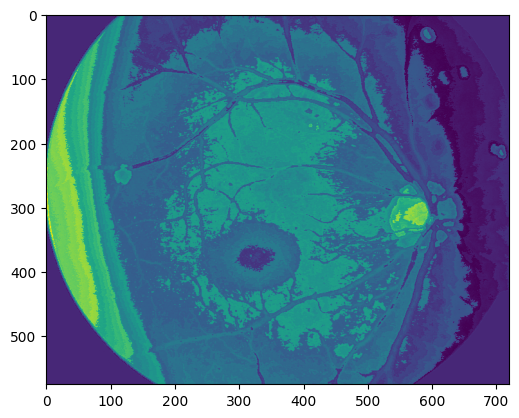

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def encrypt_image(image_path, key):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    encrypted_image = np.bitwise_xor(image, key)  # XOR each pixel with the key
    cv2.imwrite("encrypted_image.png", encrypted_image)
    return encrypted_image

def decrypt_image(encrypted_image, key):
    decrypted_image = np.bitwise_xor(encrypted_image, key)
    cv2.imwrite("decrypted_image.png", decrypted_image)
    return decrypted_image

# Load and encrypt
image_path = '/content/(0001)aria_d_27.tif'
key = 25  # Example key (should be kept secret)
encrypted_img = encrypt_image(image_path, key)
decrypted_img = decrypt_image(encrypted_img, key)
plt.imshow(encrypted_img)

water marking

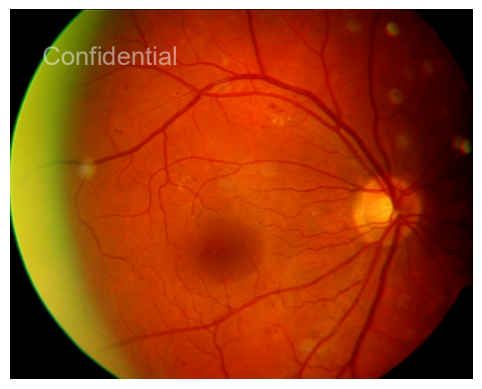

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

def add_watermark(image_path, text, position=(10, 10)):
    image = Image.open(image_path).convert("RGBA")
    watermark = Image.new("RGBA", image.size)
    draw = ImageDraw.Draw(watermark)

    # Choose a font (provide the path to a .ttf file)
    font = ImageFont.truetype("/content/arial.ttf", 40)
    draw.text(position, text, (255, 255, 255, 128), font=font)

    watermarked_image = Image.alpha_composite(image, watermark)
    watermarked_image.save("watermarked_image.png")
    return watermarked_image

# Add watermark to the image and capture the result in a variable
watermarked_image = add_watermark("/content/(0001)aria_d_27.tif", "Confidential", (50, 50))

# Display the watermarked image using matplotlib
plt.imshow(watermarked_image)
plt.axis('off')  # Hide axes for better visual
plt.show()


hashing

In [ ]:
import hashlib

def hash_image(image_path):
    with open(image_path, "rb") as f:
        image_data = f.read()
        image_hash = hashlib.sha256(image_data).hexdigest()
        return image_hash

# Calculate hash
image_hash = hash_image("/content/(0001)aria_d_27.tif")
print("Image Hash:", image_hash)

Image Hash: 12753481a9abf31260caee3781af745ab2e1ebfa39a1ce6d64db4e65c5756d5a


Digital signature

In [ ]:
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives import serialization

# Generate keys
private_key = rsa.generate_private_key(public_exponent=65537, key_size=2048)
public_key = private_key.public_key()

def sign_image(image_path, private_key):
    with open(image_path, "rb") as f:
        image_data = f.read()

    signature = private_key.sign(
        image_data,
        padding.PSS(mgf=padding.MGF1(hashes.SHA256()), salt_length=padding.PSS.MAX_LENGTH),
        hashes.SHA256()
    )
    with open("signature.sig", "wb") as sig_file:
        sig_file.write(signature)
    return signature

def verify_signature(image_path, signature, public_key):
    with open(image_path, "rb") as f:
        image_data = f.read()

    try:
        public_key.verify(
            signature,
            image_data,
            padding.PSS(mgf=padding.MGF1(hashes.SHA256()), salt_length=padding.PSS.MAX_LENGTH),
            hashes.SHA256()
        )
        print("Signature is valid.")
    except Exception as e:
        print("Signature verification failed:", e)

# Sign and verify
signature = sign_image("/content/(0001)aria_d_27.tif", private_key)
verify_signature("/content/(0001)aria_d_27.tif", signature, public_key)

Signature is valid.


Digital certificate

In [ ]:
from cryptography import x509
from cryptography.x509.oid import NameOID
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
from datetime import datetime, timedelta

# Step 1: Generate RSA Private Key
private_key = rsa.generate_private_key(
    public_exponent=65537,
    key_size=2048
)

# Step 2: Define Certificate Subject and Issuer (self-signed)
subject = x509.Name([
    x509.NameAttribute(NameOID.COUNTRY_NAME, "IN"),  # Country
    x509.NameAttribute(NameOID.STATE_OR_PROVINCE_NAME, "Telangana"),  # State
    x509.NameAttribute(NameOID.LOCALITY_NAME, "Hyderabad"),  # City
    x509.NameAttribute(NameOID.ORGANIZATION_NAME, "Simple Example Inc."),  # Organization
    x509.NameAttribute(NameOID.COMMON_NAME, "example.com"),  # Domain or Common Name
])

# Step 3: Build the Certificate
certificate = x509.CertificateBuilder().subject_name(
    subject
).issuer_name(
    subject  # Self-signed, so issuer is the same as subject
).public_key(
    private_key.public_key()
).serial_number(
    x509.random_serial_number()
).not_valid_before(
    datetime.utcnow()  # Start validity
).not_valid_after(
    datetime.utcnow() + timedelta(days=365)  # Valid for 1 year
).sign(
    private_key, hashes.SHA256()  # Sign the certificate with the private key
)

# Step 4: Save Private Key and Certificate to Files
with open("private_key.pem", "wb") as key_file:
    key_file.write(private_key.private_bytes(
        encoding=serialization.Encoding.PEM,  # Corrected Encoding
        format=serialization.PrivateFormat.TraditionalOpenSSL,
        encryption_algorithm=serialization.NoEncryption()
    ))

with open("certificate.pem", "wb") as cert_file:
    cert_file.write(certificate.public_bytes(
        encoding=serialization.Encoding.PEM  # Corrected Encoding
    ))

print("Private key and certificate created successfully!")


Private key and certificate created successfully!


In [ ]:
!pip install cryptography

EXTRA STUFF

Digital signature

In [ ]:
def euclid(m, n):

	if n == 0:
		return m
	else:
		r = m % n
		return euclid(n, r)

def exteuclid(a, b):

	r1 = a
	r2 = b
	s1 = int(1)
	s2 = int(0)
	t1 = int(0)
	t2 = int(1)

	while r2 > 0:

		q = r1//r2
		r = r1-q * r2
		r1 = r2
		r2 = r
		s = s1-q * s2
		s1 = s2
		s2 = s
		t = t1-q * t2
		t1 = t2
		t2 = t

	if t1 < 0:
		t1 = t1 % a

	return (r1, t1)

p = 823
q = 953
n = p * q
Pn = (p-1)*(q-1)

key = []

for i in range(2, Pn):

	gcd = euclid(Pn, i)

	if gcd == 1:
		key.append(i)
e = int(313)
r, d = exteuclid(Pn, e)
if r == 1:
	d = int(d)
	print("decryption key is: ", d)

else:
	print("Multiplicative inverse for\
	the given encryption key does not \
	exist. Choose a different encryption key ")

M = 19070

S = (M**d) % n

M1 = (S**e) % n

if M == M1:
	print("As M = M1, Accept the\
	message sent by Alice")
else:
	print("As M not equal to M1,\
	Do not accept the message\
	sent by Alice ")


decryption key is:  160009
As M = M1, Accept the	message sent by Alice


Diffie - hellman before modification

In [ ]:
#deffie hellman key exchange
import random

def is_primitive_root(alpha, Q):
    """Check if alpha is a primitive root of Q."""
    required_set = set(num for num in range(1, Q))
    actual_set = set(pow(alpha, power, Q) for power in range(1, Q))
    return required_set == actual_set

def find_primitive_root(Q):
    """Find a primitive root for prime Q."""
    for alpha in range(2, Q):
        if is_primitive_root(alpha, Q):
            return alpha
    return None

# Prime number Q
Q = 23  # You can use any prime number here

# Find a primitive root modulo Q
alpha = find_primitive_root(Q)
if alpha is None:
    raise ValueError(f"No primitive root found for {Q}.")
else:
    print(f"A primitive root of {Q} is {alpha}.")

# Step 1: Alice and Bob choose their private keys
X_A = random.randint(1, Q-1)  # Alice's private key
X_B = random.randint(1, Q-1)  # Bob's private key

# Step 2: Calculate public keys
Y_A = pow(alpha, X_A, Q)  # Alice's public key
Y_B = pow(alpha, X_B, Q)  # Bob's public key

# Step 3: Calculate shared secrets
shared_secret_A = pow(Y_B, X_A, Q)  # Shared secret calculated by Alice
shared_secret_B = pow(Y_A, X_B, Q)  # Shared secret calculated by Bob

# Displaying results
print(f"Alice's Private Key (X_A): {X_A}")
print(f"Bob's Private Key (X_B): {X_B}")
print(f"Alice's Public Key (Y_A): {Y_A}")
print(f"Bob's Public Key (Y_B): {Y_B}")
print(f"Alice's Shared Secret: {shared_secret_A}")
print(f"Bob's Shared Secret: {shared_secret_B}")

# Verify that both shared secrets are the same
if shared_secret_A == shared_secret_B:
    print("Key exchange successful. Shared secret is established.")
else:
    print("Key exchange failed. Shared secrets do not match.")

RC4 without built-in longer vesion

In [ ]:
# Function for encryption
def encryption():
    global key, plain_text, n , pt
    # Given text and key
    plain_text = "001010010010"
    key = "101001000001"
    # n is the no: of bits to be considered at a time
    n = 3
    print("Plain text : ", plain_text)
    print("Key : ", key)
    print("n : ", n)
    print(" ")
    # The initial state vector array
    S = [i for i in range(0, 2**n)]
    print("S : ", S)
    key_list = [key[i:i + n] for i in range(0, len(key), n)]
    # Convert to key_stream to decimal
    for i in range(len(key_list)):
        key_list[i] = int(key_list[i], 2)
    # Convert to plain_text to decimal
    pt = [plain_text[i:i + n] for i in range(0, len(plain_text), n)]
    for i in range(len(pt)):
        pt[i] = int(pt[i], 2)
    print("Plain text ( in array form ): ", pt)
    # Making key_stream equal to length of state vector
    diff = int(len(S)-len(key_list))
    if diff != 0:
        for i in range(0, diff):
            key_list.append(key_list[i])

    print("Key list : ", key_list)
    print(" ")
    # Perform the KSA algorithm
    def KSA():
        j = 0
        N = len(S)
        # Iterate over the range [0, N]
        for i in range(0, N):
            j = (j + S[i]+key_list[i]) % N
            S[i], S[j] = S[j], S[i]
            print(i, " ", end="")
            print(S)
        initial_permutation_array = S
        print(" ")
        print("The initial permutation array is : ",
              initial_permutation_array)
    print("KSA iterations : ")
    print(" ")
    KSA()
    print(" ")
    # Perform PGRA algorithm
    def PGRA():
        N = len(S)
        i = j = 0
        global key_stream
        key_stream = []
        # Iterate over [0, length of pt]
        for k in range(0, len(pt)):
            i = (i + 1) % N
            j = (j + S[i]) % N
            # Update S[i] and S[j]
            S[i], S[j] = S[j], S[i]
            print(k, " ", end="")
            print(S)
            t = (S[i]+S[j]) % N
            key_stream.append(S[t])
        # Print the key stream
        print("Key stream : ", key_stream)
        print(" ")
    print("PGRA iterations : ")
    print(" ")
    PGRA()
    # Performing XOR between generated key stream and plain text
    def XOR():
        global cipher_text
        cipher_text = []
        for i in range(len(pt)):
            c = key_stream[i] ^ pt[i]
            cipher_text.append(c)
    XOR()
    # Convert the encrypted text to bits form
    encrypted_to_bits = ""
    for i in cipher_text:
        encrypted_to_bits += '0'*(n-len(bin(i)[2:]))+bin(i)[2:]

    print(" ")
    print("Cipher text : ", encrypted_to_bits)
encryption()
print("---------------------------------------------------------")
# Function for decryption of data
def decryption():
    # The initial state vector array
    S = [i for i in range(0, 2**n)]
    key_list = [key[i:i + n] for i in range(0, len(key), n)]
    # Convert to key_stream to decimal
    for i in range(len(key_list)):
        key_list[i] = int(key_list[i], 2)
    # Convert to plain_text to decimal
    global pt
    pt = [plain_text[i:i + n] for i in range(0, len(plain_text), n)]
    for i in range(len(pt)):
        pt[i] = int(pt[i], 2)
    # making key_stream equal to length of state vector
    diff = int(len(S)-len(key_list))
    if diff != 0:
        for i in range(0, diff):
            key_list.append(key_list[i])
    print(" ")
    # KSA algorithm
    def KSA():
        j = 0
        N = len(S)
        for i in range(0, N):
            j = (j + S[i]+key_list[i]) % N
            S[i], S[j] = S[j], S[i]
            print(i, " ", end="")
            print(S)
        initial_permutation_array = S
        print(" ")
        print("The initial permutation array is : ",
              initial_permutation_array)
    print("KSA iterations : ")
    print(" ")
    KSA()
    print(" ")
    # Perform PRGA algorithm
    def do_PGRA():
        N = len(S)
        i = j = 0
        global key_stream
        key_stream = []
        for k in range(0, len(pt)):
            i = (i + 1) % N
            j = (j + S[i]) % N
            S[i], S[j] = S[j], S[i]
            print(k, " ", end="")
            print(S)
            t = (S[i]+S[j]) % N
            key_stream.append(S[t])
    print("Key stream : ", key_stream)
    print(" ")
    print("PGRA iterations : ")
    print(" ")
    do_PGRA()
    # Perform XOR between generated key stream  and cipher text
    def do_XOR():
        global original_text
        original_text = []
        for i in range(len(cipher_text)):
            p = key_stream[i] ^ cipher_text[i]
            original_text.append(p)
    do_XOR()
    # convert the decrypted text to the bits form
    decrypted_to_bits = ""
    for i in original_text:
        decrypted_to_bits += '0'*(n-len(bin(i)[2:]))+bin(i)[2:]
    print(" ")
    print("Decrypted text : ",
          decrypted_to_bits)
decryption()

RC4 with built-in

In [ ]:
from Crypto.Cipher import ARC4
from Crypto.Random import get_random_bytes

# Function to encrypt data using RC4
def rc4_encrypt(key, plaintext):
    cipher = ARC4.new(key)
    ciphertext = cipher.encrypt(plaintext.encode())
    return ciphertext

# Function to decrypt data using RC4
def rc4_decrypt(key, ciphertext):
    cipher = ARC4.new(key)
    decrypted_text = cipher.decrypt(ciphertext).decode()
    return decrypted_text

# Convert byte string to binary representation
def bytes_to_binary(byte_data):
    return ''.join(format(byte, '08b') for byte in byte_data)

# Example usage
key = get_random_bytes(16)  # RC4 key can be variable-length
plaintext = "001010010010"

# Encrypt
ciphertext = rc4_encrypt(key, plaintext)
binary_ciphertext = bytes_to_binary(ciphertext)  # Convert to binary

print(f"Ciphertext (binary): {binary_ciphertext}")

# Decrypt
decrypted_text = rc4_decrypt(key, ciphertext)
print(f"Decrypted Text: {decrypted_text}")


DES without buil-in

In [ ]:
# Hexadecimal to binary conversion
def hex2bin(s):
	mp = {'0': "0000",'1': "0001",'2': "0010",'3': "0011",'4': "0100",'5': "0101",'6': "0110",'7': "0111",'8': "1000",
		'9': "1001",'A': "1010",'B': "1011",'C': "1100",'D': "1101",'E': "1110",'F': "1111"}
	bin = ""
	for i in range(len(s)):
		bin = bin + mp[s[i]]
	return bin
# Binary to hexadecimal conversion
def bin2hex(s):
	mp = {"0000": '0',"0001": '1',"0010": '2',"0011": '3',"0100": '4',"0101": '5',"0110": '6',"0111": '7',"1000": '8',"1001": '9',"1010": 'A',"1011": 'B',"1100": 'C',"1101": 'D',"1110": 'E',"1111": 'F'}
	hex = ""
	for i in range(0, len(s), 4):
		ch = ""
		ch = ch + s[i]
		ch = ch + s[i + 1]
		ch = ch + s[i + 2]
		ch = ch + s[i + 3]
		hex = hex + mp[ch]
	return hex
# Binary to decimal conversion
def bin2dec(binary):
	binary1 = binary
	decimal, i, n = 0, 0, 0
	while(binary != 0):
		dec = binary % 10
		decimal = decimal + dec * pow(2, i)
		binary = binary//10
		i += 1
	return decimal
# Decimal to binary conversion
def dec2bin(num):
	res = bin(num).replace("0b", "")
	if(len(res) % 4 != 0):
		div = len(res) / 4
		div = int(div)
		counter = (4 * (div + 1)) - len(res)
		for i in range(0, counter):
			res = '0' + res
	return res
# Permute function to rearrange the bits
def permute(k, arr, n):
	permutation = ""
	for i in range(0, n):
		permutation = permutation + k[arr[i] - 1]
	return permutation
# shifting the bits towards left by nth shifts
def shift_left(k, nth_shifts):
	s = ""
	for i in range(nth_shifts):
		for j in range(1, len(k)):
			s = s + k[j]
		s = s + k[0]
		k = s
		s = ""
	return k
# calculating xow of two strings of binary number a and b
def xor(a, b):
	ans = ""
	for i in range(len(a)):
		if a[i] == b[i]:
			ans = ans + "0"
		else:
			ans = ans + "1"
	return ans
# Table of Position of 64 bits at initial level: Initial Permutation Table
initial_perm = [58, 50, 42, 34, 26, 18, 10, 2,
				60, 52, 44, 36, 28, 20, 12, 4,
				62, 54, 46, 38, 30, 22, 14, 6,
				64, 56, 48, 40, 32, 24, 16, 8,
				57, 49, 41, 33, 25, 17, 9, 1,
				59, 51, 43, 35, 27, 19, 11, 3,
				61, 53, 45, 37, 29, 21, 13, 5,
				63, 55, 47, 39, 31, 23, 15, 7]
# Expansion D-box Table
exp_d = [32, 1, 2, 3, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 10, 11,12, 13, 12, 13, 14, 15, 16, 17,16, 17, 18, 19, 20, 21, 20, 21,22, 23, 24, 25, 24, 25, 26, 27,28, 29, 28, 29, 30, 31, 32, 1]
# Straight Permutation Table
per = [16, 7, 20, 21,29, 12, 28, 17,1, 15, 23, 26,5, 18, 31, 10,
	2, 8, 24, 14,32, 27, 3, 9,19, 13, 30, 6, 22, 11, 4, 25]

# S-box Table
sbox = [[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
		[0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
		[4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
		[15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13]],

		[[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
		[3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
		[0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
		[13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9]],

		[[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
		[13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
		[13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
		[1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12]],

		[[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
		[13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
		[10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
		[3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14]],

		[[2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
		[14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
		[4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
		[11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3]],

		[[12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
		[10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
		[9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
		[4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13]],

		[[4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
		[13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
		[1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
		[6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12]],

		[[13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
		[1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
		[7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
		[2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11]]]
# Final Permutation Table
final_perm = [40, 8, 48, 16, 56, 24, 64, 32,
			39, 7, 47, 15, 55, 23, 63, 31,
			38, 6, 46, 14, 54, 22, 62, 30,
			37, 5, 45, 13, 53, 21, 61, 29,
			36, 4, 44, 12, 52, 20, 60, 28,
			35, 3, 43, 11, 51, 19, 59, 27,
			34, 2, 42, 10, 50, 18, 58, 26,
			33, 1, 41, 9, 49, 17, 57, 25]
def encrypt(pt, rkb, rk):
	pt = hex2bin(pt)
	# Initial Permutation
	pt = permute(pt, initial_perm, 64)
	print("After initial permutation", bin2hex(pt))
	# Splitting
	left = pt[0:32]
	right = pt[32:64]
	for i in range(0, 16):
		# Expansion D-box: Expanding the 32 bits data into 48bits
		right_expanded = permute(right, exp_d, 48)
		# XOR RoundKey[i] and right_expanded
		xor_x = xor(right_expanded, rkb[i])
		# S-boxex: substituting the value from s-box table by calculating row and column
		sbox_str = ""
		for j in range(0, 8):
			row = bin2dec(int(xor_x[j * 6] + xor_x[j * 6 + 5]))
			col = bin2dec(
				int(xor_x[j * 6 + 1] + xor_x[j * 6 + 2] + xor_x[j * 6 + 3] + xor_x[j * 6 + 4]))
			val = sbox[j][row][col]
			sbox_str = sbox_str + dec2bin(val)
		# Straight D-box: After substituting rearranging the bits
		sbox_str = permute(sbox_str, per, 32)
		# XOR left and sbox_str
		result = xor(left, sbox_str)
		left = result
		# Swapper
		if(i != 15):
			left, right = right, left
		print("Round ", i + 1, " ", bin2hex(left),
			" ", bin2hex(right), " ", rk[i])
	# Combination
	combine = left + right
	# Final permutation: final rearranging of bits to get cipher text
	cipher_text = permute(combine, final_perm, 64)
	return cipher_text
pt = "123456ABCD132536"
key = "AABB09182736CCDD"
# Key generation
# --hex to binary
key = hex2bin(key)
# --parity bit drop table
keyp = [57, 49, 41, 33, 25, 17, 9,
		1, 58, 50, 42, 34, 26, 18,
		10, 2, 59, 51, 43, 35, 27,
		19, 11, 3, 60, 52, 44, 36,
		63, 55, 47, 39, 31, 23, 15,
		7, 62, 54, 46, 38, 30, 22,
		14, 6, 61, 53, 45, 37, 29,
		21, 13, 5, 28, 20, 12, 4]
# getting 56 bit key from 64 bit using the parity bits
key = permute(key, keyp, 56)
# Number of bit shifts
shift_table = [1, 1, 2, 2,
			2, 2, 2, 2,
			1, 2, 2, 2,
			2, 2, 2, 1]
# Key- Compression Table : Compression of key from 56 bits to 48 bits
key_comp = [14, 17, 11, 24, 1, 5,
			3, 28, 15, 6, 21, 10,
			23, 19, 12, 4, 26, 8,
			16, 7, 27, 20, 13, 2,
			41, 52, 31, 37, 47, 55,
			30, 40, 51, 45, 33, 48,
			44, 49, 39, 56, 34, 53,
			46, 42, 50, 36, 29, 32]
# Splitting
left = key[0:28] # rkb for RoundKeys in binary
right = key[28:56] # rk for RoundKeys in hexadecimal
rkb = []
rk = []
for i in range(0, 16):
	# Shifting the bits by nth shifts by checking from shift table
	left = shift_left(left, shift_table[i])
	right = shift_left(right, shift_table[i])
	# Combination of left and right string
	combine_str = left + right
	# Compression of key from 56 to 48 bits
	round_key = permute(combine_str, key_comp, 48)
	rkb.append(round_key)
	rk.append(bin2hex(round_key))
print("Encryption")
cipher_text = bin2hex(encrypt(pt, rkb, rk))
print("Cipher Text : ", cipher_text)
print("Decryption")
rkb_rev = rkb[::-1]
rk_rev = rk[::-1]
text = bin2hex(encrypt(cipher_text, rkb_rev, rk_rev))
print("Plain Text : ", text)
